# Data Cleansing dan Feature Engineering Sederhana
---

<b>Pemateri:</b>
- I Gede Yudi Paramartha
- Widya Pranayoga
- Lazuardi Zulfikar W
- Bakhtiar Amaludin

**Ministry of Finance - Data Analytics Community**

## Overview Data Cleansing dan Feature Enginering

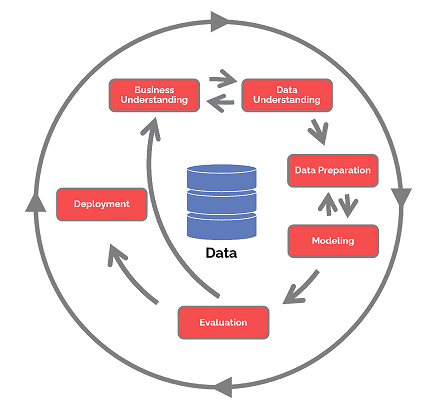

## Reviu Hasil Hasil EDA (Sesi 2)
---

### Deskripsi Kolom (Features) Dataset

Data yang digunakan adalah titatic dataset yang mendeskripsikan status dari penumpang kapal titanic. 


Berikut penjelasan atas masing-masing kolom.

|Variable|Description|
|--- |--- |
|PassengerId|Id of passenger|
|Survived|Survival (0 = No; 1 = Yes)|
|Pclass|Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)|
|Name|Name|
|Sex|Sex|
|Age|Age|
|SibSp|Number of Siblings/Spouses Aboard|
|Parch|Number of Parents/Children Aboard|
|Ticket|Ticket Number|
|Fare|Passenger Fare (British pound)|
|Cabin|Cabin|
|Embarked|Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)|

> Sumber: http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf


### Beberapa temuan masalah saat EDA

1. Terdapat kolom identitas, yaitu ```PassengerId``` yang tidak relevan.
2. Perlu pendalaman lagi apakah terdapat data duplikasi.
3. Terdapat missing values pada kolom ```Age```, ```Cabin```, dan ```Embarked```. 
4. Terdapat data outlier pada kolom ```Age``` dan ```Fare```.

### Potensi Pengembangan fitur
1. Ekstraksi inisial dari kolom ```Name``` menjadi fitur baru.
2. Pengelompokan penumpang berdasarkan kolom ```Age```.

### Tips dan Trik EDA

In [63]:
# kawan-kawan yang belum mahir coding
# Library ini dapat mempermudah EDA

import dtale
#dtale.show(df_titanic)
#dtale.open_browser()

<details> 
Cara Install dtale
    
```py
    pip install dtale
```
    
Cara Pakai:
    
```py
    import dtale
    dtale.show(dataframe)
    dtale.open_browser()
```
    
    
</details>

## Agenda Hari Ini
---

Menyelesaikan permasalahan pada poin 1.1, agar tercapai tujuan berikut:
1. Input dataset yang layak, compatible dengan kebutuhan algoritma machine learning.
2. Optimalisasi peforma dari model machine learning.

Tahapan:
1. Cleansing Data
2. Pengembangan Fitur
3. Finalisasi Dataset

## Inisiasi Library

Pada tahapan cleansing dan feature engineering kali ini, ada empat (4) library utama:

|Library|Fungsi|Cara Instalasi
|--- |--- | --- |
|pandas|Untuk membantu kita mempermudah mengolah data| Tersedia dalam paket Anaconda |
|skelarn|Untuk membantu kita melakukan deteksi outlier | Tersedia dalam paket Anaconda |
|missingno|Mempermudah pengamatan missing value secara visual| ```pip install missingno``` |
|dtale|Mempermudah Proses Exploratory Data Analysis| ```pip install dtale``` |

In [64]:
# load library
import pandas as pd

# konfigurasi pandas display (opsional)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## Load Dataset

Load dataset ke dalam dataframe dengan cara yang telah dipelajari sebelumnya. 

Dataset dapat diperoleh dari [Pranala Ini](https://raw.githubusercontent.com/mofdac/bppk-bootcamp2/master/3.%20pandas-eda/dataset/titanic.csv).

Anda bisa mengunduh dataset tersebut atau menggunakannya secara langsung.

In [65]:
# muat data dan masukan ke dalam dataframe
df_titanic = pd.read_csv('titanic.csv')

# alternatif menggunakan secara langsung
# df_titanic = pd.read_csv('https://raw.githubusercontent.com/mofdac/bppk-bootcamp2/master/3.%20pandas-eda/dataset/titanic.csv')

In [66]:
# intip isi dataframe 5 baris sample acak
df_titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S


In [67]:
#cek info dari dataframe
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Cleansing

### Terdapat kolom identitas, yaitu PassengerId yang tidak revelan

```PassengerId``` dapat dikeluarkan dari set data pelatihan karena tidak berkontribusi pada pembuatan model atau analisis.

Fungsi yang digunakan [```df.drop()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [68]:
# drop kolom passengerid
df_titanic.drop(columns='PassengerId', inplace=True)

> <b>Inplace?</b> 
> Argument [inplace](https://towardsdatascience.com/learn-how-to-use-pandas-inplace-parameter-once-and-for-all-5a29bb8bf338) , disetel True jika dataframe ingin dioverwrite langsung tanpa membuat variable baru. 

```py
# jika ingin hasilnya ditampung di variable baru 
df_titanic2 = df_titanic.drop(columns='PassengerId', inplace=True)

```

### Pengecekan data duplikasi

#### Memeriksa duplikasi

Cara yang paling sederhana adalah dengan memilih keseluruhan fitur/kolom sebagai argument.

Cara ini cukup mudah tapi dalam beberapa kasus, kita perlu memastikan bahwa data duplikasi hanya ditentukan oleh kolom-kolom tertentu saja.

Dalam konteks titanic dataset, karena ini satu penumpang ke penumpang lain unik maka menggunakan keseluruhan parameter dianjurkan, untuk memastikan bahwa satu baris dengan baris lainnya berbeda. 

> Fungsi yang digunakan [```df.duplicated()```](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html).

In [69]:
# melakukan pengecekan data duplikasi dengan seluruh kolom sebagai parameter
df_titanic.duplicated().sum()

0

<b>Drop Berdasarkan kolom tertentu saja</b>

Kita dapat menyetel argument subset pada fungsi ```df_titanic.duplicated(subset=['kolom1', 'kolom2'])``` untuk melakukan hal ini.

In [70]:
# untuk memilah kolom PessengerId dan Name sebagai parameter pengecekan duplikasi
df_titanic.duplicated(subset=['Sex', 'Name']).sum()

0

#### Menghapus duplikasi

Ternyata tidak ada duplikasi disini. 
Nah asumsinya jika ternyata kita mengetahui adanya duplikasi.
Kita bisa menggunakan fungsi [```df.drop_duplicate()```](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html). 

Untuk mendemonstrasikan ini kita akan coba sedikit membuat skenario berikut.

In [71]:
# menambahkan kolom pada dataframe dengan 5 data teratas dataframe yang sama
# replikasi 5 kolom teratas sehingga terjadi duplikasi
df_titanic = pd.concat([df_titanic, df_titanic.head(5)])

In [72]:
# cek hasilnya beberapa baris memiliki duplikasi
df_titanic.duplicated().sum()

5

In [73]:
# kita coba drop baris yang duplikasi lagi
df_titanic.drop_duplicates(inplace=True)
df_titanic.duplicated().sum()

0

**Simpulan**: Tidak diketemukan data yang duplikasi. Telah berhasil didemonstrasi penghapusan duplikasi apabila ada.

### Penanganan missing value pada kolom Age, Cabin, dan Embarked

Kenapa masalah Missing Value harus kita atasi?

> Missing values are common occurrences in data. Unfortunately, most predictive modeling techniques cannot handle any missing values. Therefore, this problem must be addressed prior to modeling.

Feature Engineering and Selection, 2019.

3 Tipe [Missing Value](https://blog.usejournal.com/missing-data-its-types-and-statistical-methods-to-deal-with-it-5cf8b71a443f):
1. Missing completely at random (MCAR). 
2. Missing at random (MAR). 
3. Missing not random (MNAR). 

<details>
Misal kita diminta untuk membuat model dari Age (Y) yang dipengaruhi oleh jenis kelamin (X) beberapa responden tidak memberikan jawaban atas pertanyaan berapa berat mereka.
    
1. MCAR terjadi jika tidak ada alasan yang jelas kenapa responden tidak memberikan jawaban.
2. MAR terjadi jika orang yang berjenis kelamin perempuan akan cenderung tidak memberikan jawaban jika ditanya umur, jadi missing value Y dipengaruhi oleh X.
3. MNAR terjadi jika orang dengan kelas penghasilan tertentu, memiliki kecenderungan tidak memberikan jawaban. Sehingga missing value Y dipengaruhi oleh nilai lain yang tidak teramati.
</details>

Beberapa fungsi utama yang digunakan:
1. [library ```missingno```](https://github.com/ResidentMario/missingno)
2. [```df.isnull()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html)
3. [```df.fillna()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
4. [```df.groupby()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
5. [```df.loc()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)
6. [```df.column.plot()```](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html)
7. [```df.column.skew()```](https://pandas.pydata.org/docs/reference/api/pandas.Series.skew.html)
8. [```df.column.value_counts()```](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

**Observasi awal**

In [74]:
# lihat missing value dengan fungsi .isnul()
df_titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:>

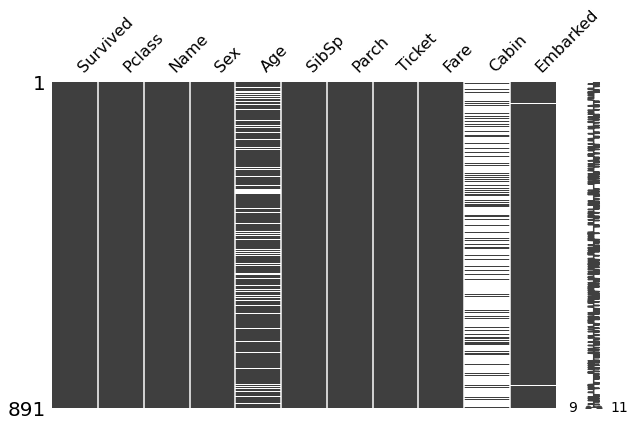

In [75]:
# visualiasi missing value dengan bantuan library
import missingno as msno
msno.matrix(df_titanic, figsize=(10, 6))

> Pertanyaan: missing value dihapus atau bagaimana?

#### Kolom Age

#####  Imputasi dengan mean atau median (Univariate)
Metode pertama  kita implementasikan adalah mengisi missing value dengan mean atau median berdasarkan perhitungan keseluruhan kolom ```Age``` saja.

Hasilnya kita dapat memperhasikan efek yang berbeda dari pengisian tersebut dengan metode tersebut.

<AxesSubplot:title={'center':'Age Sebelum Imputasi'}, ylabel='Frequency'>

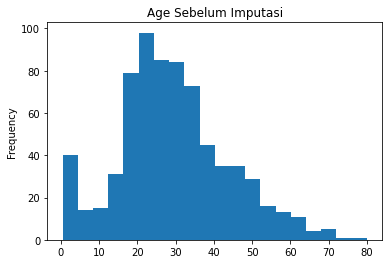

In [76]:
# melihat distribusi awal dari kolom Age
df_titanic.Age.plot.hist(title="Age Sebelum Imputasi", bins=20)

In [77]:
# melihat kecondongan distribusi kolom Age. Kecondongan yang baik itu dari -1 sampai dengan 1
df_titanic.Age.skew()

0.38910778230082704

In [78]:
# fungsi fillna di panda dapat digunakan untuk imputasi missing values
# taruh hasilnya di variable baru untuk mempermudah pengamatan
df_titanic['Age_mean_uni'] = df_titanic.Age.fillna(df_titanic.Age.mean())
df_titanic['Age_median_uni'] = df_titanic.Age.fillna(df_titanic.Age.median())

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Age_mean_uni'}>],
       [<AxesSubplot:title={'center':'Age_median_uni'}>, <AxesSubplot:>]],
      dtype=object)

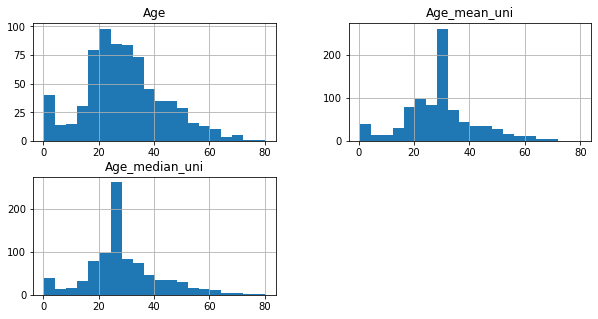

In [79]:
# melihat histogram sebelum dan sesudah imputasi 
df_titanic[['Age', 'Age_mean_uni','Age_median_uni']].hist(bins=20, figsize=(10,5))

In [80]:
# skewness sebelum dan sesudah imputasi
df_titanic[['Age', 'Age_mean_uni','Age_median_uni']].skew()

Age               0.389108
Age_mean_uni      0.434488
Age_median_uni    0.510245
dtype: float64

#####  Imputasi dengan Mean berdasarkan kelompok/parameter lain (Multivariate)
Solusi alternatif jika kita ingin melakukan imputasi missing value, dibandingkan kita memukul rata isian missing value pada kolom ```Age``` dengan mean atau median dari seluruh data.

Kita bisa mengelompokan terlebih dahulu berdasarkan kolom lain (dalam hal ini adalah ```Sex``` sehingga imputasi dilakukan terhadap kelompok yang sama sehingga diharapkan hasilnya lebih <i>smooth</i>.

In [81]:
# mengetahui mean per kelompok sex, kita menggunakan groupby
df_grouped = df_titanic[['Sex', 'Age']].groupby(['Sex']).mean()
df_grouped

,Age
Sex,
female,27.915709
male,30.726645


<b>Proses Imputasi</b>

Setelah mengetahui mean dari masing-masing group, kita bisa melakukkan imputasi.

In [82]:
# imputasi untuk male group

# filter kondisi 
condition = df_titanic['Sex'] == 'male'

# tangkap nilai mean untuk laki2
mean_male = df_grouped.loc['male','Age']

# imputasi
df_titanic.loc[condition, 'Age_mean_multi'] = df_titanic.loc[condition,'Age'].fillna(mean_male)

In [83]:
# proses untuk female sama seperti diatas
condition = df_titanic['Sex'] == 'female'
mean_female = df_grouped.loc['female','Age']
df_titanic.loc[condition, 'Age_mean_multi'] = df_titanic.loc[condition,'Age'].fillna(mean_female)

<b>Lihat Hasilnya:</b>

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Age_mean_uni'}>],
       [<AxesSubplot:title={'center':'Age_mean_multi'}>, <AxesSubplot:>]],
      dtype=object)

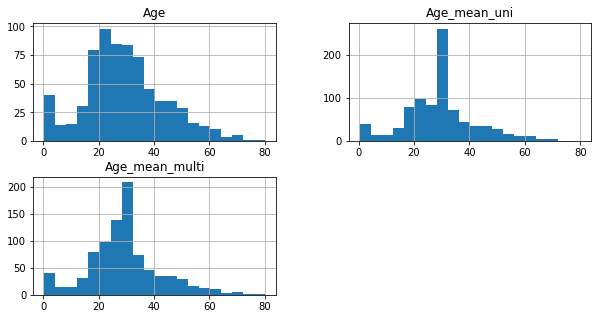

In [84]:
# melihat histogram sebelum dan sesudah imputasi 
df_titanic[['Age', 'Age_mean_uni','Age_mean_multi']].hist(bins=20, figsize=(10,5))

In [86]:
# skewness sebelum dan sesudah imputasi
df_titanic[['Age', 'Age_mean_uni','Age_mean_multi']].skew()

Age               0.389108
Age_mean_uni      0.434488
Age_mean_multi    0.424586
dtype: float64

**Simpulan**: Melihat hasil skewness dari ```Age_mean_multi``` yang cukup bagus (mendekati 0), kita memilih hasil ini untuk digunakan sebagai parameter bantu pada analisis selanjutnya. 

Namun dibuka kemungkinan apabila saat implementasi model, peforma dari model masih tidak sesuai harapan, ```Age_mean_multi``` dapat diganti dengan ```Age_median_uni```.

#### Kolom Cabin

Pada kolom ```Cabin``` dikarenakan mayoritas data adalah missing value dan kita punya tidak cukup ide untuk mengisinya. 

Apabila kita paksa imputasi akan sangat bias dan tidak bisa menggambarkan situasi sebenarnya.  

Maka, solusinya kolom ```cabin``` lebih baik dihilangkan menggunakan fungsi ```.drop()```.

In [87]:
# drop kolom menggunakan fungsi .drop()
df_titanic.drop(columns='Cabin', inplace = True)

In [88]:
# cek sisa kolom
df_titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Age_mean_uni', 'Age_median_uni', 'Age_mean_multi'],
      dtype='object')

**Simpulan**: Kolom ```Cabin``` sudah tidak lagi menjadi fitur dalam pengembangan model.

#### Kolom Embarked

In [89]:
# cek value counts (size masing-masing kelas)
df_titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [90]:
# cek detail data yang kosong
df_titanic[df_titanic.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,38.0,38.0,38.0
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,62.0,62.0,62.0


Kita bisa membuat dugaan awal bahwa kolom ```Embarked``` ini mungkin ada kaitannya dengan kolom lain yakni ```Ticket```. 

Untuk itu lakukan penelusuran, apakah ada nomor tiket dengan pola sejenis dengan data hilang

In [91]:
# polanya di cek dengan fungsi .match
# pola yang digunakan adalah cari tiket yang diawali dengan '113'

df_titanic[(df_titanic.Ticket.str.match('^113'))].sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi
763,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.00,S,36.000000,36.0,36.000000
185,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.00,S,29.699118,28.0,30.726645
166,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.00,S,29.699118,28.0,27.915709
137,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.10,S,37.000000,37.0,37.000000
694,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.55,S,60.000000,60.0,60.000000


In [93]:
# Cek tiket dengan nomor yang sama df_titanic[(df_titanic.Ticket== '113776)]

In [94]:
# cek distribusi count tiket dengan pola str '113'
df_titanic[df_titanic.Ticket.str.match('^113')].Embarked.value_counts()

S    41
C     4
Name: Embarked, dtype: int64

> Dari distribusinya tiket dengan nomor seri 113, memiliki probabilitas lebih tinggi bahwa penumpang naik dari pelabuhan S.

In [95]:
# kita bisa menggunakan modus dari distribusinya, yaitu 'S'
# implementasi menggunakan fungsi .fillna()
df_titanic.Embarked.fillna('S', inplace = True)

In [96]:
# cek setelah implementasi
df_titanic.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

**Simpulan**: Hasil imputasi missing values pada kolom ```Embarked```, menambah jumlah kategori ```S``` dari 644 ke 646.

<details>
    <center><span style="font-size:40px"
                  >Quiz Time #1</span>

Link: https://www.mentimeter.com/s/b583005b8fd547d4afb439c5117f33d9/fc896ae6875a

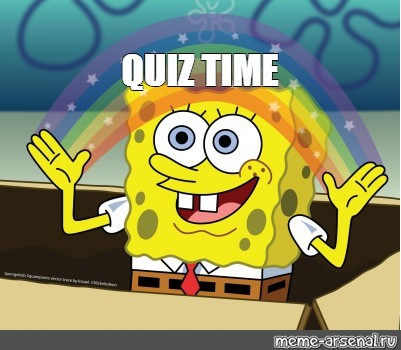
</center>
</details>

### Penanganan outlier pada kolom Fare

Sumber:

1. https://www.mikulskibartosz.name/outlier-detection-with-scikit-learn/
2. https://www.kaggle.com/kevinarvai/outlier-detection-practice-uni-multivariate
3. https://nitin9809.medium.com/outlier-detection-and-treatment-part-1-aa0b09f60e50

Beberapa fungsi dan library yang digunakan:
1. library [```DBSCAN```](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).
2. library [```MinMaxScaler```](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).
3. [```df.quantile()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html).
4. [```df.mean()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html).
5. [```df.fillna()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html?highlight=fillna#pandas.DataFrame.fillna).
5. dst.

#### Deteksi outlier secara univariate

**Box plot**

Jarak antar bagian di box menunjukkan derajat dispersi (penyebaran) dan __skewness__ (kecondongan) dalam data. 

Bagian dari box adalah bidang yang menyajikan __interquartile range (IQR)__.

Panjang box ditentukan oleh IQR ini.

Semakin tinggi (jika boxplot vertikal) atau semakin lebar (jika boxplot horizontal) bidang IQR ini, menunjukkan data semakin menyebar.

<AxesSubplot:>

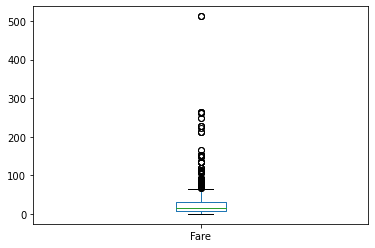

In [97]:
df_titanic.Fare.plot.box()

**Interquartile range**

IQR mendeskripsi bagian tengah atau 50% dari nilai jika diurutkan dari terendah ke tertinggi.

Untuk mendapatkan nilai IQR, langkah pertama adalah menemukan median dari batas bawah (Q1) dan batas atas (Q3) dari distribusi data.

IQR adalah beda antara Q3 dan Q1.

Kemudian setelah mendapatkan IQR, kita akan menghitung whisker minimal (iqr_lower) dan maksimal (iqr_upper).

Nilai diluar iqr_lower dan iqr_upper adalah outlier.

<details>
    
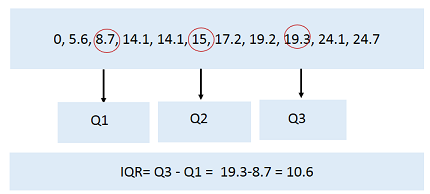

</details>

In [98]:
# menghitung Q1 dan Q3
q1 = df_titanic['Fare'].quantile(0.25)
q3 = df_titanic['Fare'].quantile(0.75)

# menghitung IQR
iqr = q3 - q1

# menghitung batas bawah dan batas atas
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr

In [99]:
# print hasil
(iqr_lower, iqr_upper)

(-26.724, 65.6344)

In [100]:
# contoh outlier dengan nilai kurang dari iqr_lower
df_titanic[df_titanic.Fare < iqr_lower]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi


In [101]:
# contoh outlier dengan nilai lebih dari iqr_upper
df_titanic[df_titanic.Fare > iqr_upper].sample(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi
665,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,S,32.0,32.0,32.0
311,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,C,18.0,18.0,18.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,38.0,38.0,38.0


***Cara penanganan outlier:***
1. Membuang outlier tersebut
2. Melakukan imputasi nilai (mengganti nilainya). 

Disini kami contohkan jika ingin melakukan imputasi menggunakan mean.

In [102]:
# ganti nilai outliner dengan na sehingga menjadi missing value
df_titanic['Fare_iqr'] = df_titanic['Fare']
df_titanic.loc[df_titanic['Fare_iqr'] < iqr_lower, 'Fare_iqr'] = pd.NA
df_titanic.loc[df_titanic['Fare_iqr'] > iqr_upper, 'Fare_iqr'] = pd.NA

In [103]:
# cek implementasi missing value
df_titanic.Fare_iqr.isna().sum()

116

<AxesSubplot:>

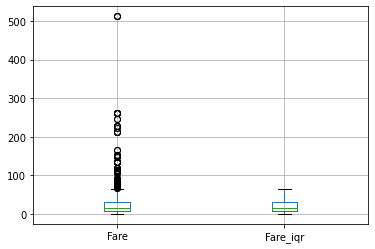

In [104]:
# imputasi NaN dengan mean
df_titanic['Fare_iqr'].fillna(df_titanic.Fare.mean(),inplace=True)

# tampilkan box plot
df_titanic[['Fare','Fare_iqr']].boxplot()

**Simpulan**: Perlu kehati-hatian dalam mengimplementasikan metode IQR.

IQR dapat digunakan apabila sebaran data kita sempit.

#### Deteksi outlier secara multivariate

Deteksi outlier bedasarkan pengamatan terhadap lebih dari 1 features biasa dikenal dengan multivariate outlier detections. 

Dalam kasus ini kita coba mengkoreksi data outlier ```Fare``` dengan bantuan dari variable lain yakni ```Age```.

Kemudian kita melihat apakah ada outlier dengan melihat kerapatan data menggunakan library DBSCAN.

**Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**

Metode clustering menggunakan machine learning untuk memisahkan cluster dengan density tinggi dari cluster dengan density rendah.

<AxesSubplot:xlabel='Age_scaled', ylabel='Fare_scaled'>

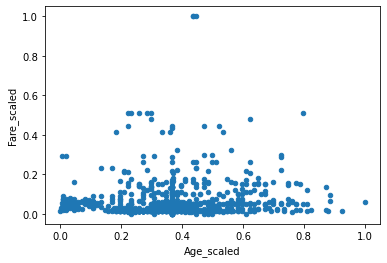

In [105]:
# load dictionary
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

# lakukan standarisasi data agar skalanya sama
scaler = MinMaxScaler()
df_titanic['Fare_scaled'] = scaler.fit_transform(df_titanic[['Fare']])
df_titanic['Age_scaled'] = scaler.fit_transform(df_titanic[['Age_mean_uni']])

# visualisasikan dua features ini dalam bentuk scatter
df_titanic.plot.scatter(y = 'Fare_scaled', x = 'Age_scaled')

In [106]:
DBSCAN_model = DBSCAN(eps = 0.5, metric = 'euclidean', min_samples = 3, n_jobs = -1)

# fit model
clusters = DBSCAN_model.fit_predict(df_titanic[['Fare_scaled', 'Age_scaled']])

# simpan hasil clustering ke kolom baru
df_titanic['Is_outlier'] = clusters

# hasil cluster akan ada dua 0 tidak outlier, 1 merupakan outlier
# pd.Series(clusters).value_counts() ==> cek

In [107]:
# lookup data yang outlier
df_titanic[df_titanic['Is_outlier']==1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi,Fare_iqr,Fare_scaled,Age_scaled,Is_outlier
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,36.0,36.0,36.0,32.204208,1.0,0.447097,1
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1


In [108]:
# membuat satu kolom baru yang isinya sama dengan Fare
df_titanic['Fare_dbscan'] = df_titanic['Fare']

##### Imputasi dengan Mean

In [118]:
# dapatkan mean dari Fare
fare_mean = df_titanic[df_titanic['Is_outlier']==0].Fare.mean()

# isikan nilai mean ke nilai outlier
df_titanic.loc[df_titanic['Is_outlier']==1, 'Fare_dbscan'] = fare_mean

In [119]:
#pengecekan nilai Fare_dbscan
df_titanic.loc[df_titanic['Is_outlier']==1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi,Fare_iqr,Fare_scaled,Age_scaled,Is_outlier,Fare_dbscan
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1,30.582164
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,36.0,36.0,36.0,32.204208,1.0,0.447097,1,30.582164
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1,30.582164


##### Imputasi dengan Mean Kelompok Pemberangkatan

Sebagaimana kita ketahui bahwa hasil deteksi outlier di atas, kesemuanya berangkat dari pelabuhan C dengan seri ```Ticket``` yang sama. 

Dibandingkan menggunakan mean dari seluruh penumpang, kita bisa coba gunakan mean dari penumpang lain dari kelompok pemberangkatan ```Embarked``` yang sama.

In [123]:
df_titanic.loc[df_titanic['Is_outlier']==0, ['Fare','Embarked']].groupby(by='Embarked').agg(['describe'])

Fare                                                           \
         describe                                                            
            count       mean        std     min      25%      50%      75%   
Embarked                                                                     
C           165.0  51.729143  57.953950  4.0125  13.4167  28.7125  76.7292   
Q            77.0  13.276030  14.188047  6.7500   7.7500   7.7500  15.5000   
S           646.0  27.243651  35.952905  0.0000   8.0500  13.0000  27.9000   

                   
                   
              max  
Embarked           
C         262.375  
Q          90.000  
S         263.000

In [124]:
# isikan ke nilai outlier yang sudah jadi NA
fare_mean_C = df_titanic[(df_titanic['Is_outlier'] == 0) & (df_titanic['Embarked'] == 'C')].Fare.mean()
df_titanic.loc[df_titanic['Is_outlier']==1, 'Fare_dbscan'] = fare_mean_C

In [125]:
#pengecekan nilai Fare_dbscan
df_titanic.loc[df_titanic['Is_outlier']==1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi,Fare_iqr,Fare_scaled,Age_scaled,Is_outlier,Fare_dbscan
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1,51.729143
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,36.0,36.0,36.0,32.204208,1.0,0.447097,1,51.729143
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1,51.729143


##### Jika kita mengasumsikan terjadi salah ketik di nama tiket
Dari deskripsi statistik masing-masing group ```Embarked``` mean untuk data ```Fare``` penumpang yang berangkat dari pelabuhan C memiliki mean di nilai ```51.73```. 

Kita dapat juga berasumsi bahwa outlier ```512.3292``` itu bisa jadi typo dan mungkin maksudnya ```51.2329```

In [126]:
# langsung koreksi 
#df_titanic.loc[df_titanic['Is_outlier']==1, 'Fare_dbscan'] = 51.2329

**Simpulan**: Untuk mempertajam analisis kita saat mendeteksi outlier, kita bisa menggunakan kolom lain sebagai fitur tambahan dan mengimplementasikannya menggunakan DBSCAN.

Kita menggunakan kolom Ticket sebagai fitur yang dapat membantu kita mendeteksi outlier pada kolom Fare.

## Pengembangan fitur

### Ekstraksi inisial dari kolom Name sebagai fitur

Jika kita telusuri di kolom name akan terlihat bahwa kolom ini adalah kolom yang sangat unit dengan tingkat cardinality yang tinggi. 

Beberapa dari kita mungkin akan melakukan drop terhadap kolom ini.

Namun jika bisa lebih teliti, ada satu pola yang kita bisa ekstrak dan memberikan nilai tambah pada dataset kita.

Dalam hal ini, kita akan melakukan ekstraksi gelar sosial pada nama seperti Mr. Miss. Mrs. sebagai menggunakan regex.

Beberapa fungsi dan library yang digunakan:
1. [```RegEx```](https://docs.python.org/3/howto/regex.html).
2. ```df.column.replace()```.
3. ```df.column.value_counts()```
4. Library [```One Hot Encoder```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).
5. dst.

In [127]:
df_titanic[['Name']].sample(5)

,Name
486,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)"
606,"Karaic, Mr. Milan"
729,"Ilmakangas, Miss. Pieta Sofia"
76,"Staneff, Mr. Ivan"
341,"Fortune, Miss. Alice Elizabeth"


In [128]:
# extract gelar pada nama menggunakan regex dan simpan ke kolom baru
df_titanic['Initial'] = df_titanic.Name.str.extract('(\w+)\.')

In [129]:
# cek distribusi count
df_titanic.Initial.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Don           1
Ms            1
Countess      1
Sir           1
Mme           1
Jonkheer      1
Lady          1
Capt          1
Name: Initial, dtype: int64

In [132]:
# melakukan perbaikan atas inisial yang munkin salah tulis, atau tidak sesuai kriteria
# menggunakan fungsi .replace()

replace_dict =  {'Mlle': 'Miss',
                 'Mme': 'Miss',
                 'Ms': 'Miss',
                 'Dr': 'Mr',
                 'Major': 'Mr',
                 'Lady': 'Mrs',
                 'Countess': 'Mrs',
                 'Jonkheer': 'Other',
                 'Col': 'Other',
                 'Rev': 'Other',
                 'Capt': 'Mr',
                 'Sir': 'Mr',
                 'Don': 'Mr'}

df_titanic['Initial'].replace(replace_dict,inplace=True)

In [133]:
# cek distribusi count setelah perbaikan

df_titanic.Initial.value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initial, dtype: int64

**Simpulan**: Telah diekstraksi data dari kolom Name menjadi informasi yang bernilai tambah, dan disimpan pada kolom Initial.

### Pengelompokan penumpang berdasarkan kolom Age

Binning adalah teknik mengkonversi data numerical menjadi categorical, dengan menggunakan range.

Fungsi yang digunakan, [```pd.cut()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html).

Misalkan:

|Age|Category|
|--- |--- |
|0-15|child|
|16-30|young_adult|
|31-50|adult|
|>50|elderly|

In [134]:
# membuat varible baru bernama cut_points
# merupakan batas dari setiap kategori
cut_points = [0, 15, 30, 50, 100]

# membuat label atas kategorinya
age_label = ['child', 'young_adult', 'adult', 'elderly']

# implementasi label tersebut dengan membuat kolom baru bernama age_label
df_titanic['Age_group'] = pd.cut(df_titanic['Age_mean_uni'], bins=cut_points, labels=age_label, include_lowest=True)

In [135]:
# print hasil implementasi
df_titanic.sample(3)[['Age_group','Age_mean_uni']]

,Age_group,Age_mean_uni
112,young_adult,22.000000
484,young_adult,25.000000
65,young_adult,29.699118


**Simpulan**: Telah dikategorikan range ```Age``` pada kolom ```Age_group```.

## Finalisasi Dataset

### Encoding Kolom Kategorikal

Akan dijelaskan beberapa insight baru terkait pemanfaatan data menjadi informasi lewat kolom tersebut.

Beberapa fungsi dan library yang digunakan:
1. library [```LabelEncoder```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).
2. dictionary ```{}```.
3. [```df.Series.map()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html).
4. dst.

> NB: Kolom Age_categori dan Initial_name baru akan muncul setelah tahapan ini.

#### Kolom Sex

Label encoding digunakan untuk mengubah data categorical menjadi nominal. 

In [136]:
# cek ada berapa label pada kolom sex
df_titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

Karena hanya ada 2 distinct values (low cardinality), kita cukup pakai dictionary untuk labeling.

In [137]:
# membuat dictionary, 0 untuk male dan 1 untuk female
label_sex = {'male':0,'female':1}

# gunakan fungsi map pada pandas untuk mengaplikasikan labeling
df_titanic['Sex_enc'] = df_titanic['Sex'].map(label_sex)

# print hasil implementasi
df_titanic[['Name','Sex','Sex_enc']].sample(3)

,Name,Sex,Sex_enc
593,"Bourke, Miss. Mary",female,1
708,"Cleaver, Miss. Alice",female,1
299,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,1


**Simpulan**: kategori male dan female sudah berubah menjadi 0 dan 1.

#### Kolom Embarked

Jika jumlah kelas pada variabel kategori sangat banyak (high cardinality).

**Kita tidak mungkin melakukanya secara manual menggunakan dictionary**. 

Oleh karenanya kita perlu menggunakan bantuan library salah satunya adalah Label Encoder di scikit learn.

In [138]:
# load library
from sklearn.preprocessing import LabelEncoder

# inisiasi encoder
le = LabelEncoder()

# fiting dan transform ke model
df_titanic['Embarked_enc'] = le.fit_transform(df_titanic['Embarked'])

In [140]:
# print hasil implementasi
df_titanic[['Name','Embarked','Embarked_enc']].sample(3)

,Name,Embarked,Embarked_enc
591,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",C,0
798,"Ibrahim Shawah, Mr. Yousseff",C,0
271,"Tornquist, Mr. William Henry",S,2


**Simpulan**: kategori C, Q, dan S sudah berubah menjadi 0, 1 dan 2.

#### Kolom Initial

Dari hasil ekstraksi fitur, kita memperoleh 5 jenis kategorikal.

Sebelumnya kita sudah kenal cara melakukan encoding dengan menggunakan dictionary dan LabelEncoder.

Untuk kali ini akan kita implementasikan satu teknik lainnya, yaitu One Hot Encoding.

***Kenapa kita menggunakannya?***

Label Encoding adalah kategori sekarang memiliki urutan (natural order). 

Komputer secara alami akan memberikan angka yang lebih tinggi, bobot yang lebih tinggi. 

Untuk mengatasinya kita menggunakan One Hot Encoding.

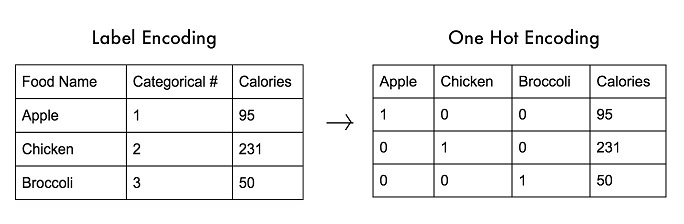

Sumber: https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179


In [141]:
# load library 
from sklearn.preprocessing import OneHotEncoder 

# inisiasi encoder 
ohc = OneHotEncoder(handle_unknown='ignore')

# fit dan transform
new_features = ohc.fit_transform(df_titanic[['Initial']])

# masukan ke dataframe hasilnya
cols_name= [x for x in df_titanic['Initial'].unique()]
df_initial_ohc = pd.DataFrame(new_features.toarray(), columns=cols_name)

df_initial_ohc.sample(3)

,Mr,Mrs,Miss,Master,Other
652,0.0,0.0,1.0,0.0,0.0
143,0.0,0.0,1.0,0.0,0.0
137,0.0,0.0,1.0,0.0,0.0


In [142]:
# gabung hasilnya ke df_titanic
df_titanic = pd.concat([df_titanic, df_initial_ohc], axis=1)

In [143]:
# print hasil implementasi
df_titanic.sample(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi,Fare_iqr,Fare_scaled,Age_scaled,Is_outlier,Fare_dbscan,Initial,Age_group,Sex_enc,Embarked_enc,Mr,Mrs,Miss,Master,Other
236,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,S,44.000000,44.0,44.000000,26.000000,0.050749,0.547625,0,26.0000,Mr,adult,0,2,0.0,0.0,1.0,0.0,0.0
849,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C,29.699118,28.0,27.915709,32.204208,0.173920,0.367921,0,89.1042,Mrs,young_adult,1,0,0.0,0.0,0.0,1.0,0.0
68,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,S,17.000000,17.0,17.000000,7.925000,0.015469,0.208344,0,7.9250,Miss,young_adult,1,2,0.0,1.0,0.0,0.0,0.0


**Simpulan**: Sudah diimplementasikan OHE pada kol

#### Kolom Age Group

Sama seperti sebelumnya, kita akan implementasikan OHE untuk kolom ```Age_group```

In [144]:
# fit dan transform
new_features = ohc.fit_transform(df_titanic[['Age_group']])

# masukan ke dataframe hasilnya
cols_name= [x for x in df_titanic['Age_group'].unique()]
df_age_group_ohc = pd.DataFrame(new_features.toarray(), columns=cols_name)

df_age_group_ohc.sample(3)

,young_adult,adult,elderly,child
860,1.0,0.0,0.0,0.0
201,0.0,0.0,0.0,1.0
815,0.0,0.0,0.0,1.0


In [145]:
# gabung hasilnya ke df_titanic
df_titanic = pd.concat([df_titanic, df_age_group_ohc], axis=1)

In [146]:
# print hasil implementasi
df_titanic.sample(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi,Fare_iqr,Fare_scaled,Age_scaled,Is_outlier,Fare_dbscan,Initial,Age_group,Sex_enc,Embarked_enc,Mr,Mrs,Miss,Master,Other,young_adult,adult,elderly,child
536,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,S,45.000000,45.0,45.000000,26.5500,0.051822,0.560191,0,26.5500,Mr,adult,0,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
608,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)",female,22.0,1,2,SC/Paris 2123,41.5792,C,22.000000,22.0,22.000000,41.5792,0.081157,0.271174,0,41.5792,Mrs,young_adult,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
560,0,3,"Morrow, Mr. Thomas Rowan",male,NaN,0,0,372622,7.7500,Q,29.699118,28.0,30.726645,7.7500,0.015127,0.367921,0,7.7500,Mr,young_adult,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


**Simpulan**: Sudah diimplementasikan OHE pada kolom Age_group.

### Simpan Dataset 

Hasil dari seluruh tahapan data cleansing dan feature engginering yang kita telah selesaikan dapat kita simpan ke dalam file yang baru untuk dapat digunakan di proses selanjutnya

In [147]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Age_mean_uni', 'Age_median_uni', 'Age_mean_multi',
       'Fare_iqr', 'Fare_scaled', 'Age_scaled', 'Is_outlier', 'Fare_dbscan',
       'Initial', 'Age_group', 'Sex_enc', 'Embarked_enc', 'Mr', 'Mrs', 'Miss',
       'Master', 'Other', 'young_adult', 'adult', 'elderly', 'child'],
      dtype='object')

> Note: Kolom ```Ticket``` tidak dipilih karena memiliki karakteristik seperti PessengerId, hanya sebagai identitas. 

In [148]:
columns_to_keep = ['Survived', 'Pclass', 'Age_mean_multi', 'Fare_dbscan',
                  'Sex_enc', 'Embarked_enc', 'Mr', 'Mrs', 'Miss', 'Master',
                   'Other', 'young_adult', 'adult', 'elderly', 'child']

In [149]:
df_titanic = df_titanic[columns_to_keep]

In [150]:
#melihat sample data akhir yang sudah bersih
df_titanic.sample(3)

,Survived,Pclass,Age_mean_multi,Fare_dbscan,Sex_enc,Embarked_enc,Mr,Mrs,Miss,Master,Other,young_adult,adult,elderly,child
152,0,3,55.500000,8.0500,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
739,0,3,30.726645,7.8958,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
773,0,3,30.726645,7.2250,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#mengexport data ke dalam bentuk CSV
df_titanic.to_csv('titanic_clean.csv', index=False)

<details>
    <center><span style="font-size:40px"
                  >Quiz Time #2</span>

Link: https://www.mentimeter.com/s/9640807ff62c4aaa4f053b3136660aeb/15dd7ea6804f

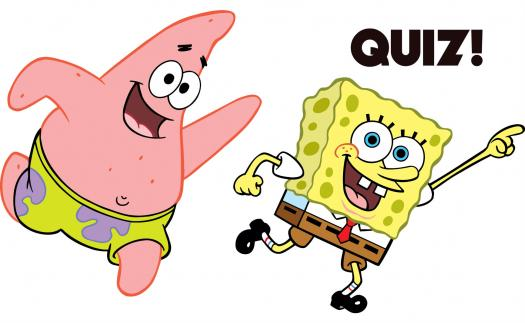
</center>
</details>